In [ ]:
# Heart Data Site
# https://archive.ics.uci.edu/ml/datasets/heart+disease

In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn import datasets
import torch.nn as nn

torch.manual_seed(4) # Manual seed to initialize values.

In [ ]:
#######################
######## INTRO ########
#######################

python_list = [4, 6, 9, 11, 5, 3] 
numpy_array = np.array(python_list)

torch_tensor = torch.tensor(numpy_array)
torch_tensor_linked = torch.from_numpy(numpy_array) 

print(python_list)
print(numpy_array)
print(torch_tensor)

[4, 6, 9, 11, 5, 3]
[ 4  6  9 11  5  3]
tensor([ 4,  6,  9, 11,  5,  3])


In [ ]:
# Transforming tensor back to an array:
back_to_array = torch_tensor.numpy()
back_to_array

array([ 4,  6,  9, 11,  5,  3])

In [ ]:
# Reshaping an array:
numpy_array_reshaped = numpy_array.reshape(3, 2) # (rows, cols)
numpy_array_reshaped

# There's also view(), but that doesn't change the tensor inplace...

array([[ 4,  6],
       [ 9, 11],
       [ 5,  3]])

In [ ]:
# Range tensor:
range_tensor = torch.arange(0, 20, 4)
range_tensor

tensor([ 0,  4,  8, 12, 16])

In [ ]:
# Linear Spacing tensor:
linspace_tensor = torch.linspace(0, 10, 100)
linspace_tensor

tensor([ 0.0000,  0.1010,  0.2020,  0.3030,  0.4040,  0.5051,  0.6061,  0.7071,
         0.8081,  0.9091,  1.0101,  1.1111,  1.2121,  1.3131,  1.4141,  1.5152,
         1.6162,  1.7172,  1.8182,  1.9192,  2.0202,  2.1212,  2.2222,  2.3232,
         2.4242,  2.5253,  2.6263,  2.7273,  2.8283,  2.9293,  3.0303,  3.1313,
         3.2323,  3.3333,  3.4343,  3.5354,  3.6364,  3.7374,  3.8384,  3.9394,
         4.0404,  4.1414,  4.2424,  4.3434,  4.4444,  4.5455,  4.6465,  4.7475,
         4.8485,  4.9495,  5.0505,  5.1515,  5.2525,  5.3535,  5.4545,  5.5556,
         5.6566,  5.7576,  5.8586,  5.9596,  6.0606,  6.1616,  6.2626,  6.3636,
         6.4646,  6.5657,  6.6667,  6.7677,  6.8687,  6.9697,  7.0707,  7.1717,
         7.2727,  7.3737,  7.4747,  7.5758,  7.6768,  7.7778,  7.8788,  7.9798,
         8.0808,  8.1818,  8.2828,  8.3838,  8.4848,  8.5859,  8.6869,  8.7879,
         8.8889,  8.9899,  9.0909,  9.1919,  9.2929,  9.3939,  9.4950,  9.5960,
         9.6970,  9.7980,  9.8990, 10.00

In [ ]:
# Sample from a Gaussian (normal) distribution (mean=0, SD=1)
random_uniform_tensor = torch.randn(2, 5)
random_uniform_tensor

tensor([[-1.6053,  0.2325,  2.2399,  0.8473,  1.2006],
        [-0.4016, -1.4260,  0.9039,  0.8557,  0.6889]])

In [ ]:
###################################
######## LINEAR REGRESSION ########
###################################

Text(0.5, 0, 'X')

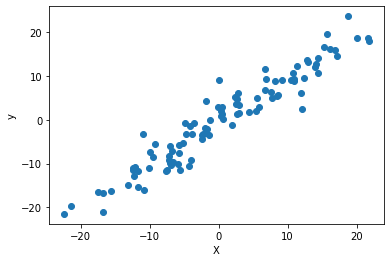

In [ ]:
X = torch.randn(100, 1) * 10
y = X + 3*torch.randn(100, 1) 

x_array = X.numpy()
y_array = y.numpy()

plt.plot(X.numpy(), y_array, 'o') 
plt.ylabel("y")
plt.xlabel("X")

In [ ]:
# Use the Linear class from Pytorch to implement a model. 
class LinearRegressionModel(nn.Module):
  # "in_features" & "out_features" are the dimensions of the input & output spaces
  def __init__(self, in_features, out_features):
    super().__init__() # Boilerplate...
    # Inside the constructor, pass dimensions
    self.linear = nn.Linear(in_features, out_features) 

  # Class method to make predictions
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [ ]:
model = LinearRegressionModel(1, 1) # Create a class instance w/ one incoming feature (x) and one output feature (y)

weight = model.linear.weight
bias = model.linear.bias

# Print the randomly seeded weight and bias values. 
print(weight)
print(bias)

Parameter containing:
tensor([[-0.8227]], requires_grad=True)
Parameter containing:
tensor([-0.2257], requires_grad=True)


In [ ]:
# Make a prediction:
x = torch.tensor([4.0])
sample_pred = model.forward(x)
print(sample_pred)

tensor([-3.5165], grad_fn=<AddBackward0>)


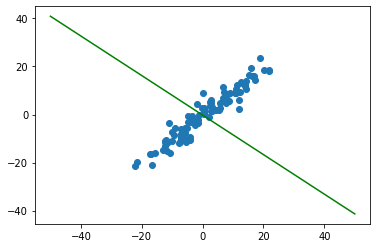

In [ ]:
x1 = np.linspace(-50, 50, 100)
w1 = weight.item()
b1 = bias.item()
y1 = w1 * x1 + b1 # y = m * x + b

plt.scatter(x_array, y_array) # Numpy array from earlier.
plt.plot(x1, y1, 'g') 

In [ ]:
# Declare a loss function. Goal is to minimize this function.
criterion = nn.MSELoss()

# Pick an optimizer (Stochastic Gradient Descent) & learning rate.
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

epochs = 1000 # Number of cycles through the entire dataset.
 
losses = []

for i in range(epochs):
  y_pred = model.forward(X) # Make a prediction for every sample.
  loss = criterion(y_pred, y) # Calculate the loss between the predicted values and true y-values.
  losses.append(loss.item()) # Append the loss to losses list (to plot later).
  #print("epoch:", i, "loss:", loss.item())
  optimizer.zero_grad() # Gradients accumulate; zero out the gradients for every epoch.
  loss.backward() # Compute the gradient / derivative of the loss function.
  optimizer.step() # Update the parameters.

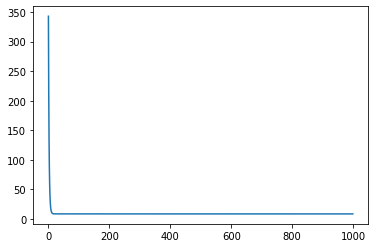

In [ ]:
plt.plot(range(epochs), losses)

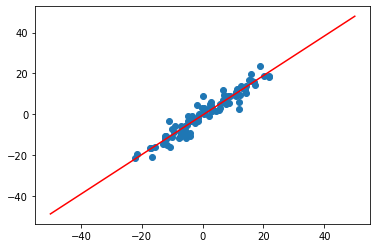

In [ ]:

_X = np.linspace(-50, 50, 100) # initial x values to test

_w1 = model.linear.weight.item()
_b1 = model.linear.bias.item()

_y = _w1 * _X + _b1

plt.scatter(X.numpy(), y.numpy()) # Original
plt.plot(_X, _y, 'red') # New ones...